<a href="https://colab.research.google.com/github/bhanu-50/Probability/blob/main/Probability_Distribution_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo -O weight-height.csv

--2025-06-14 07:34:30--  https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.google.com (drive.google.com)... 172.253.62.139, 172.253.62.101, 172.253.62.102, ...
Connecting to drive.google.com (drive.google.com)|172.253.62.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo [following]
--2025-06-14 07:34:30--  https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.16.132, 2607:f8b0:4004:c17::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.16.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.04s   

2025-06-14 07:34:33 (10.2 MB/

In [4]:
df_hw = pd.read_csv("weight-height.csv")
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df_height = df_hw["Height"]
df_height.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [6]:
df_height.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


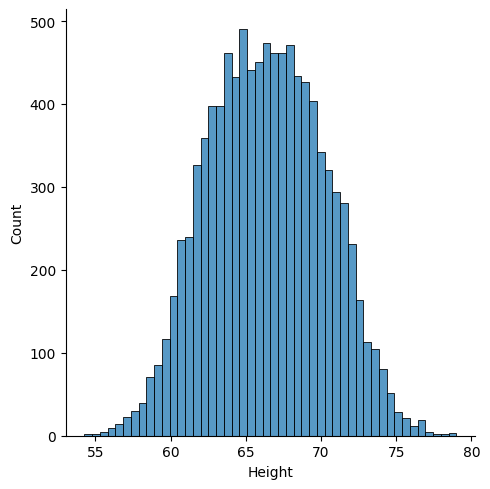

In [7]:
sns.displot(df_height)

<Axes: xlabel='Height', ylabel='Density'>

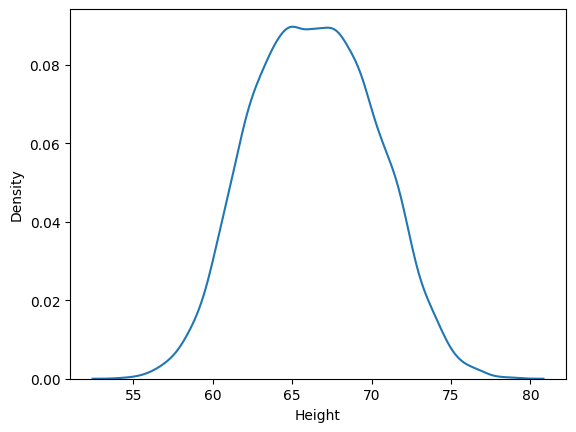

In [8]:
sns.kdeplot(df_height)

### Casino Case Study

- A bag ----> 3 red balls,2 blue balls

- **Event** : Pick a ball write its colour and put it back in the bag.


In [9]:
# This event is performed 4 times and if all 4 times red ball is picked, you get 150 rupees else you lose 10 rupees.
# "R","R","R","B","B"

rolls = np.random.choice(["R","R","R","B","B"], size = 4)
rolls

array(['R', 'R', 'R', 'B'], dtype='<U1')

In [10]:
rolls == "R"

array([ True,  True,  True, False])

In [11]:
np.count_nonzero(rolls == "R")

3

In [12]:
red_values = []

for person in range(10000):
    rolls = np.random.choice(["R","R","R","B","B"], size = 4)
    num_red = np.count_nonzero(rolls=="R")
    red_values.append(num_red)

red_values[ : 10]

[4, 1, 4, 2, 0, 2, 1, 3, 2, 2]

In [26]:
pd.value_counts(red_values)

,count
3,3496
2,3422
1,1533
4,1290
0,259


In [14]:
3477/10000

0.3477

In [29]:
x = pd.value_counts(red_values,normalize=True)
x

,proportion
3,0.3496
2,0.3422
1,0.1533
4,0.1290
0,0.0259


In [16]:
# Expectation of a random variable X, is the weighted average of the values that X takes,
# with the weights being the probabilities.

(2 * 0.3469 + 3 * 0.3444 + 1 * 0.1522 + 4 * 0.1305 + 0 * 0.026)

2.4012000000000002

In [17]:
np.mean(red_values)

np.float64(2.4025)

In [18]:
# Mathamatical approch
P_R = 3/5
P_B = 2/5

In [19]:
# Probability of geting zero red ball out of 4 picks P(X==0):
P_0_Red = math.pow(P_B,4)
P_0_Red

0.025600000000000005

In [20]:
# Probability of geting one red ball out of 4 picks P(X==1):
P_1_Red =  math.comb(4,1) * math.pow(P_R,1) * math.pow(P_B,3)
P_1_Red

0.15360000000000004

In [21]:
# Probability of geting one red ball out of 4 picks P(X==1):
P_2_Red =  math.comb(4,2) * math.pow(P_R,2) * math.pow(P_B,2)
P_2_Red

0.3456000000000001

In [22]:
# Probability of geting one red ball out of 4 picks P(X==1):
P_3_Red =  math.comb(4,3) * math.pow(P_R,3) * math.pow(P_B,1)
P_3_Red

0.34559999999999996

In [23]:
# Probability of geting one red ball out of 4 picks P(X==1):
P_4_Red =  math.comb(4,4) * math.pow(P_R,4) * math.pow(P_B,0)
P_4_Red

0.1296

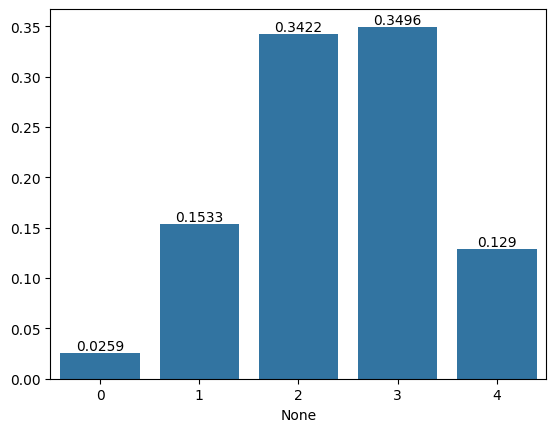

In [38]:
ax = sns.barplot(x = x.index, y = x.values )
for i in ax.containers:
    ax.bar_label(i)

In [42]:
from scipy.stats import binom

In [53]:
prob_0_red = binom.pmf(n=4,p=3/5,k=0)
prob_1_red = binom.pmf(n=4,p=3/5,k=1)
prob_2_red = binom.pmf(n=4,p=3/5,k=2)
prob_3_red = binom.pmf(n=4,p=3/5,k=3)
prob_4_red = binom.pmf(n=4,p=3/5,k=4)
prob_0_red,prob_1_red,prob_2_red,prob_3_red,prob_4_red

(np.float64(0.025599999999999994),
 np.float64(0.15359999999999996),
 np.float64(0.3456),
 np.float64(0.3456000000000001),
 np.float64(0.1296))

In [58]:
#We can expect out of four we can get 2-3
binom.expect(args=(4,3/5))

np.float64(2.4000000000000004)

In [111]:
#variance
binom.var(n=4,p=3/5)


np.float64(0.96)

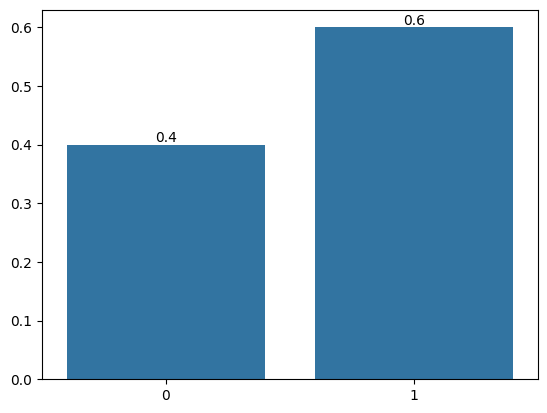

In [116]:
#Bernoli trail
#if(n==1)
#Bainomail -----> Bernoli trail
x = [0,1]
y = [2/5,3/5]
ax1 = sns.barplot(x=x,y=y)
for i in ax1.containers:
    ax1.bar_label(i)

In [117]:
# Binomial distribution -> It is the collection of Bernoulli trials for the same event,
# i.e., it contains more than 1 Bernoulli event for the same scenario for which the Bernoulli trial is calculated.

### You toss 2 dice. If both dice are 6, you get Rs 2. if one die is 6, you get Rs 1 Otherwise ,you don't get anything.

- Let's define a random variable x that represets the amount of money won.
- Hance it can take the value x=[0,1,2]


In [118]:
#Using function
binom.pmf(n=2,p=1/6,k=0)

np.float64(0.6944444444444443)

In [120]:
binom.pmf(n=2,p=1/6,k=1)

np.float64(0.27777777777777773)

In [128]:
binom.pmf(n=2,p=1/6,k=2)

np.float64(0.027777777777777776)

In [119]:
#Using Formula
math.comb(2,0) * math.pow(1/6,0) * math.pow(5/6,2)

0.6944444444444445

In [121]:
math.comb(2,1) * math.pow(1/6,1) * math.pow(5/6,1)

0.2777777777777778

In [123]:
math.comb(2,2) * math.pow(1/6,2) * math.pow(5/6,0)

0.027777777777777776